In [1]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')

## reading data from the csv file

In [4]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)

# we are arranging the ratings according to time.
df.sort_values(by='date', inplace=True)
df.head()

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11
6901473,1367,510180,5.0,1999-11-11
49973109,9003,510180,3.0,1999-11-11
20393918,3870,510180,2.0,1999-11-11


In [5]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)

# we are arranging the ratings according to time.
df.sort_values(by='date', inplace=True)
df.head()

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11
6901473,1367,510180,5.0,1999-11-11
49973109,9003,510180,3.0,1999-11-11
20393918,3870,510180,2.0,1999-11-11


### Is there any entry that has Nan values...??

In [6]:
# it returns True for a row that has atleast one Nan value.
null_bool = df.isnull().any(axis = 1)
df[null_bool]

,movie,user,rating,date
95880696,16992,962,NaN,NaT
95963294,17002,51082,NaN,NaT


In [7]:
df.drop(df[null_bool].index, inplace=True)

In [8]:
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


### Let's try to find the duplicates if any...

In [9]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp )
print("There are {} duplicate rating entries in the data..".format(dups))

There are 1211 duplicate rating entries in the data..


In [10]:
# let's find what are the movies that has duplicate entries of user ratings....
df[dup_bool].movie.value_counts()

16969    762
16968    449
Name: movie, dtype: int64

__Removing those duplicate entries__  (inplace)

In [11]:
df.drop(df[dup_bool].index, inplace=True)

In [12]:
print("No of duplicate rows (movie, user, rating) entries :", sum(df.duplicated()))

No of duplicate rows (movie, user, rating) entries : 0


In [13]:
print("\nNo of ratings that we have, after removing nan rows and duplicates are :", df.shape[0])


No of ratings that we have, after removing nan rows and duplicates are : 100479045


## No. of Ratings, Users and Movies  

In [14]:
movies = df.movie.value_counts()
users = df.user.value_counts()
ratings = df.rating
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Total data 
--------------------------------------------------

Total no of ratings : 100479045
Total No of Users   : 480189
Total No of movies  : 17770


## Train data

In [15]:
big_train_df = df.iloc[:int(df.shape[0]*0.80)]

In [16]:
big_train_df.shape

(80383236, 4)

In [17]:
big_train_df.head(2)

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11


In [18]:
movies = big_train_df.movie.value_counts()
users = big_train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",big_train_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Training data 
--------------------------------------------------

Total no of ratings : 80383236
Total No of Users   : 405024
Total No of movies  : 17423


# 2. Creating sparse matrix for Train data

In [19]:
import os
from scipy import sparse
start = datetime.now()
if os.path.isfile('sample/train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('sample/train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((big_train_df.rating.values, (big_train_df.user.values,
                                               big_train_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')
 
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:03.095818


### Sparsity

In [20]:
u,m = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

In [21]:
print("Sparsity Of matrix : {} % ".format(  (1-(elem/(u*m))) * 100) )

Sparsity Of matrix : 99.82927583214679 % 


## Test

In [23]:
big_test_df = df.iloc[int(df.shape[0]*0.80) : ]
big_test_df.shape

(20095809, 4)

In [24]:
big_test_df.head(2)

,movie,user,rating,date
52863848,9617,316390,2.0,2005-08-08
12989568,2462,605375,4.0,2005-08-08


In [25]:
movies = big_test_df.movie.value_counts()
users = big_test_df.user.value_counts()

print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",big_test_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Test data 
--------------------------------------------------

Total no of ratings : 20095809
Total No of Users   : 349327
Total No of movies  : 17757


# 3. Creating sparse matrix for Test data

In [26]:
import os
from scipy import sparse
start = datetime.now()
if os.path.isfile('sample/test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('sample/test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((big_test_df.rating.values, (big_test_df.user.values,
                                               big_test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
 
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.847732


### Sparsity

In [27]:
u,m = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

In [28]:
print("Sparsity Of matrix : {} % ".format(  (1-(elem/(u*m))) * 100) )

Sparsity Of matrix : 99.95731855608713 % 


# Sampling Train and Test data 

In [29]:
import os
import random

## Train

In [121]:
import os
from scipy import sparse

start = datetime.now()
if os.path.isfile('sample/big/sample_train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz('sample/big/sample_train_sparse_matrix.npz')
    print("DONE..")
else: 
    train_row_ind, train_col_ind = train_sparse_matrix.nonzero()
    train_row_ind = np.unique(train_row_ind)
    train_col_ind = np.unique(train_col_ind)

    print("In big matrix, (users, movies) : ({} {})".format(len(train_row_ind), len(train_col_ind)))

    np.random.seed(15)
    sample_train_movies = np.random.choice(train_col_ind, 2000, replace=False)
    sample_train_users = np.random.choice(train_row_ind, 20000, replace=False)

    sample_train_sparse_matrix = train_sparse_matrix[sample_train_users, :][:,sample_train_movies]
    
    print('In sampled matrix, (users, movies) : ',[len(np.unique(i)) for i in sample_train_sparse_matrix.nonzero()])
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/big/sample_train_sparse_matrix.npz", sample_train_sparse_matrix)
    print('Done..\n')


print(datetime.now() - start)

In big matrix, (users, movies) : (405024 17423)
In sampled matrix, (users, movies) :  [18755, 1949]
Saving it into disk for furthur usage..
Done..

0:00:06.566973


In [122]:
sample_train_sparse_matrix.count_nonzero()

486139

## Test

In [62]:
import os
from scipy import sparse

start = datetime.now()
if os.path.isfile('sample/big/sample_test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz('sample/big/sample_test_sparse_matrix.npz')
    print("DONE..")
else: 
    test_row_ind, test_col_ind = test_sparse_matrix.nonzero()
    test_row_ind = np.unique(test_row_ind)
    test_col_ind = np.unique(test_col_ind)

    print("In big matrix (users, movies) : ({} {})".format(len(test_row_ind), len(test_col_ind)))

    np.random.seed(15)
    sample_test_movies = np.random.choice(test_col_ind, 3500, replace=False)
    sample_test_users = np.random.choice(test_row_ind, 10000, replace=False)

    sample_test_sparse_matrix = test_sparse_matrix[sample_test_users, :][:,sample_test_movies]
    print('In sampled matrix, (users, movies) : ',[len(np.unique(i)) for i in sample_test_sparse_matrix.nonzero()])
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/big/sample_test_sparse_matrix.npz", sample_test_sparse_matrix)
    print('Done..\n')


print(datetime.now() - start)

In big matrix (users, movies) : (349327 17757)
In sampled matrix, (users, movies) :  [8377, 2843]
Saving it into disk for furthur usage..
Done..

0:00:01.732235


# Computing Average Ratings (from Train data)

In [123]:
averages = dict()

In [124]:
# Boolean matrix of ratings ( whether a user rated that movie or not)
is_rated = sample_train_sparse_matrix!=0

In [125]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
averages['global'] = global_average
averages

{'global': 3.568888733469234}

### User averages

In [126]:
# get the user averages in dictionary (key: userid, value: avg rating)
#_____________________________________________________________________#

# ".A1" is for converting Column_Matrix to 1-D numpy array 
sum_of_ratings_per_user = sample_train_sparse_matrix.sum(axis=1).A1
# no of ratings that each user has given.
no_of_ratings_per_user = is_rated.sum(axis=1).A1

# creae a dictonary of users and their average ratigns..
average_user_ratings = { i : sum_of_ratings_per_user[i]/no_of_ratings_per_user[i]  
                                 for i in range(sample_train_sparse_matrix.shape[0]) 
                                    if no_of_ratings_per_user[i] !=0}

# add user averages to th eaverages dictionary
averages['user'] = average_user_ratings

# test it..
averages['user'][97]

4.416666666666667

### Movie Averages

In [127]:
# get the Movie Average ratings in dictionary (key: movieId, value: avg_rating)
#_____________________________________________________________________#

# sum of the ratings that a movie got by any user(who rated that movie..)
sum_of_ratings_per_movie = sample_train_sparse_matrix.sum(axis=0).A1
# no of ratings that a movie got.
no_of_ratings_per_movie = is_rated.sum(axis=0).A1

average_movie_ratings = {i : sum_of_ratings_per_movie[i]/ no_of_ratings_per_movie[i] 
                                for i in range(sample_train_sparse_matrix.shape[1])
                                    if no_of_ratings_per_movie[i]!=0 }

# add thie'per_movie' avg ratings to averages dictionary
averages['movie'] = average_movie_ratings

# test this dictionary
averages['movie'][30]

3.7222222222222223

# Preparing Train and Test data for XGBoost

In [128]:
from sklearn.metrics.pairwise import cosine_similarity

In [130]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [131]:
len((sample_train_users)), len(sample_train_movies), len(sample_train_ratings)

(486139, 486139, 486139)

## Preparing Train data 

In [135]:
start = datetime.now()
print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
with open('sample/big/reg_train.csv', mode='a') as reg_data_file:
    count = 0
    for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
        st = datetime.now()
    #     print(user, movie)    
        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
        # compute the similar Users of the "user"        
        user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
        top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
        # get the ratings of most similar users for this movie
        top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
        # we will make it's length "5" by adding movie averages to .
        top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
        top_sim_users_ratings.extend([averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
    #     print(top_sim_users_ratings, end=" ")    


        #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
        # compute the similar movies of the "movie"        
        movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
        top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
        # get the ratings of most similar movie rated by this user..
        top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
        # we will make it's length "5" by adding user averages to.
        top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
        top_sim_movies_ratings.extend([averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
    #     print(top_sim_movies_ratings, end=" : -- ")

        #-----------------prepare the row to be stores in a file-----------------#
        row = list()
        row.append(averages['global']) # first feature
        # next 5 features are similar_users "movie" ratings
        row.extend(top_sim_users_ratings)
        # next 5 features are "user" ratings for similar_movies
        row.extend(top_sim_movies_ratings)
        # Avg_user rating
        row.append(averages['user'][user])
        # Avg_movie rating
        row.append(averages['movie'][movie])
        
        # finalley, The actual Rating of this user-movie pair...
        row.append(rating)
        count = count + 1
    
        # add rows to the file opened..
        reg_data_file.write(','.join(map(str, row)))
        reg_data_file.write('\n')        
        if (count)%10000 == 0:
            # print(','.join(map(str, row)))
            print("Done for {} rows----- {}".format(count, datetime.now() - start))

    
print(datetime.now() - start)

preparing 486139 tuples for the dataset..

Done for 10000 rows----- 0:08:03.887619
Done for 20000 rows----- 0:15:58.535663
Done for 30000 rows----- 0:23:54.509861
Done for 40000 rows----- 0:31:53.502397
Done for 50000 rows----- 0:39:41.475544
Done for 60000 rows----- 0:47:28.208205
Done for 70000 rows----- 0:55:15.760737
Done for 80000 rows----- 1:03:12.795898
Done for 90000 rows----- 1:11:14.229762
Done for 100000 rows----- 1:19:13.871468
Done for 110000 rows----- 1:27:10.819626
Done for 120000 rows----- 1:34:58.287869
Done for 130000 rows----- 1:42:50.616603
Done for 140000 rows----- 1:50:47.326196
Done for 150000 rows----- 1:58:44.850418
Done for 160000 rows----- 2:06:36.060288
Done for 170000 rows----- 2:14:43.438436
Done for 180000 rows----- 2:23:00.415882
Done for 190000 rows----- 2:31:18.221799
Done for 200000 rows----- 2:39:32.282568
Done for 210000 rows----- 2:47:48.309580
Done for 220000 rows----- 2:56:06.151247
Done for 230000 rows----- 3:04:30.412961
Done for 240000 rows---

## Preparing Test data

In [152]:
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [154]:
len(sample_test_users), len(sample_test_movies), len(sample_test_ratings)

(110403, 110403, 110403)

In [157]:
start = datetime.now()
cold_start_count = 0
print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
with open('sample/big/reg_test.csv', mode='a') as reg_data_file:
    count = 0 
    for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
        st = datetime.now()

    #--------------------- Ratings of "movie" by similar users of "user" ---------------------
        #print(user, movie)
        try:
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_test_sparse_matrix[user], sample_test_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_test_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
            #print(top_sim_users_ratings, end="--")
                
        except KeyError:
            # It is a new User or new Movie or there are no ratings for given user for top similar movies...
            ########## Cold STart Problem ##########
            cold_start_count = cold_start_count + 1
            top_sim_users_ratings.extend([averages['global']]*(5 - len(top_sim_users_ratings)))
            #print(top_sim_users_ratings)
        except:
            # we just want KeyErrors to be resolved. Not every Exception...
            raise

    
    
        #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
        try:
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_test_sparse_matrix[:,movie].T, sample_test_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_test_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
            #print(top_sim_movies_ratings)
        except KeyError:
            cold_start_count = cold_start_count + 1
            #print(top_sim_movies_ratings, end=" : -- ")
            top_sim_movies_ratings.extend([averages['global']]*(5-len(top_sim_movies_ratings)))
            #print(top_sim_movies_ratings)
        except :
            raise

        #-----------------prepare the row to be stores in a file-----------------#
        row = list()
        row.append(averages['global']) # first feature
        #print(row)
        # next 5 features are similar_users "movie" ratings
        row.extend(top_sim_users_ratings)
        #print(row)
        # next 5 features are "user" ratings for similar_movies
        row.extend(top_sim_movies_ratings)
        #print(row)
        # Avg_user rating
        try:
            row.append(averages['user'][user])
        except KeyError:
            row.append(averages['global'])
        except:
            raise
        #print(row)
        # Avg_movie rating
        try:
            row.append(averages['movie'][movie])
        except KeyError:
            row.append(averages['global'])
        except:
            raise
        #print(row)
        # finalley, The actual Rating of this user-movie pair...
        row.append(rating)
        #print(row)
        count = count + 1
    
        # add rows to the file opened..
        reg_data_file.write(','.join(map(str, row)))
        #print(','.join(map(str, row)))
        reg_data_file.write('\n')        
        if (count)%5000 == 0:
            #print(','.join(map(str, row)))
            print("Done for {} rows----- {}".format(count, datetime.now() - start))
print("",datetime.now() - start)
print("\nNo. of cold start problems handled :", cold_start_count)

preparing 110403 tuples for the dataset..

Done for 5000 rows----- 0:00:47.641956
Done for 10000 rows----- 0:01:37.213664
Done for 15000 rows----- 0:02:27.491132
Done for 20000 rows----- 0:03:17.163393
Done for 25000 rows----- 0:04:07.150655
Done for 30000 rows----- 0:04:57.326758
Done for 35000 rows----- 0:05:47.083802
Done for 40000 rows----- 0:06:37.829753
Done for 45000 rows----- 0:07:27.659082
Done for 50000 rows----- 0:08:17.933582
Done for 55000 rows----- 0:09:08.228947
Done for 60000 rows----- 0:09:58.370452
Done for 65000 rows----- 0:10:48.477590
Done for 70000 rows----- 0:11:38.465279
Done for 75000 rows----- 0:12:28.649760
Done for 80000 rows----- 0:13:18.481430
Done for 85000 rows----- 0:14:08.208188
Done for 90000 rows----- 0:14:57.167112
Done for 95000 rows----- 0:15:45.948180
Done for 100000 rows----- 0:16:35.284533
Done for 105000 rows----- 0:17:22.691259
Done for 110000 rows----- 0:18:08.849243
 0:18:12.642936

No. of cold start problems handled : 54799


#### Percentage if Cold Start Cases handled

In [158]:
print("Cold Start Cases : {}%".format((cold_start_count/len(sample_test_ratings)) * 100 ))

Cold Start Cases : 49.635426573553254%


 ## Reading from the file to make a dataframe

In [136]:
reg_train = pd.read_csv('sample/reg_train.csv', header=None)
reg_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.624457,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,3.895522,2.00,3.0
1,3.624457,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,4.0,3.238636,2.00,1.0
2,3.624457,3.0,3.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,4.0,3.761905,3.35,3.0
3,3.624457,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.090909,3.35,5.0
4,3.624457,3.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,5.0,3.0,3.172414,3.35,3.0


In [137]:
reg_train.shape

(126228, 14)

# XGBoost Regressor

Install xgboost in windows : https://www.youtube.com/watch?v=k51sX_ApQYU 

In [138]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [139]:
import xgboost as xgb

In [140]:
reg_xgb = xgb.XGBRegressor(silent=False, n_jobs=10, random_state=15)

In [141]:
x_train = reg_train.drop([13], axis=1)

y_train = reg_train[13]

In [142]:
start = datetime.now()

In [143]:
reg_xgb.fit(x_train, y_train, eval_metric = 'rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=15,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [144]:
print(datetime.now() - start)

0:00:00.980052


In [145]:
start =datetime.now()
y_train_pred = reg_xgb.predict(x_train)
print(datetime.now()-start)

0:00:00.060093


In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = np.mean(np.abs( (y_train.values - y_train_pred)/y_train.values )) * 100

In [148]:
rmse_train, mape_train

(0.8473548013960125, 25.039259953928468)

In [149]:
xgb.plot_importance(reg_xgb)

<IPython.core.display.Javascript object>


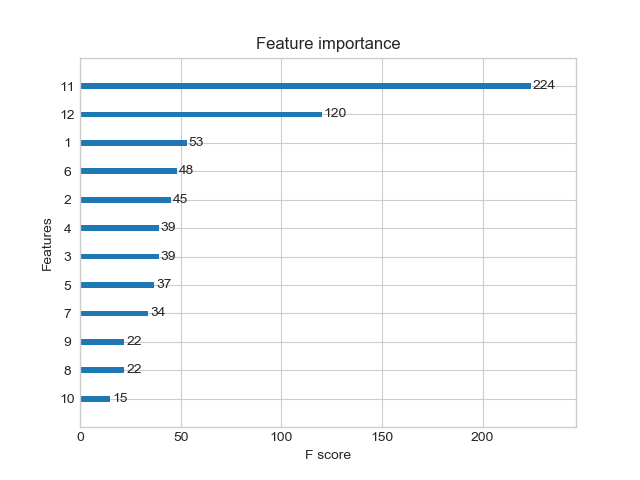

In [150]:
plt.show()

## Testing it with the test data

In [159]:
reg_test_df = pd.read_csv('sample/reg_test.csv', header=None)
reg_test_df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.624457,5.0,4.0,4.0,5.0,4.0,4.20339,4.20339,4.20339,4.20339,4.20339,4.203390,2.0,3.0
1,3.624457,3.0,3.0,2.0,4.0,4.0,5.00000,4.00000,3.00000,3.00000,3.00000,3.000000,2.0,5.0
2,3.624457,3.0,4.0,4.0,2.0,4.0,5.00000,4.00000,5.00000,3.00000,5.00000,3.500000,2.0,3.0
3,3.624457,3.0,3.0,5.0,4.0,4.0,5.00000,5.00000,5.00000,5.00000,2.00000,4.133333,2.0,5.0


In [160]:
x_test = reg_test_df.drop([13], axis=1)

y_test = reg_test_df[13]

## For basic model

In [161]:
y_test_pred = reg_xgb.predict(x_test)
mape_test = np.mean(np.abs( (y_test.values - y_test_pred)/y_test.values )) * 100
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_test, mape_test

(1.190164934503154, 35.03456000202348)